In [1]:
using FileIO, Plots
gr()
default(fmt = :png)

In [21]:
p_new = load("../experiments/baseline/common_parameters.jld2")["parameters"]
p_old = load("../experiments/old/common_parameters.jld2")["parameters"]
data = load("../data/impvol_data.jld2")

Dict{String,Any} with 10 entries:
  "import_shares"             => [0.0 7.85e-7 … 0.000689 0.0004425; 7.42e-5 0.0…
  "pwt"                       => [0.824111 0.620073 … 0.747101 1.0]…
  "va"                        => [3271.5 1407.45 … 4209.16 41311.0]…
  "p_sectoral_data"           => [33.0109 64.7924 … 16.8926 36.7882]…
  "io_values"                 => [2.49202e5 2423.0 … 6491.5 0.0; 4183.8 56086.1…
  "total_output"              => [2.00728e6 8.11942e5 … 1.74308e6 66853.4]…
  "intermediate_input_shares" => [0.973154 0.0268455 … 0.528231 0.294862]…
  "trade_balance"             => [1184.95 -1239.14 … -406.84 1074.1]…
  "output_shares"             => [0.967079 0.032921 … 0.521898 0.318506]…
  "beta"                      => [0.230777 0.441 … 0.297884 0.370242]…

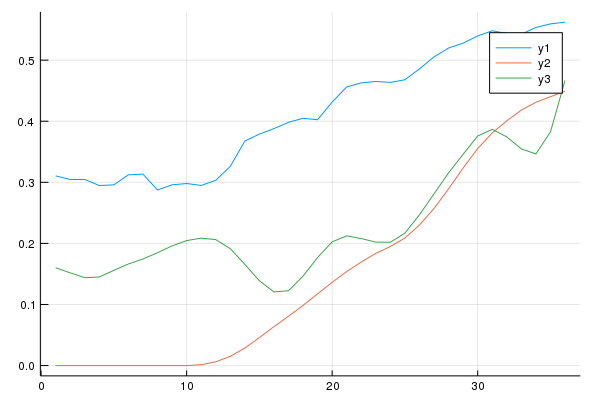

In [22]:
va_share = data["va"] ./ sum(data["va"], 3)
plot([va_share[1,5,end,:] p_old[:final_expenditure_shares][1,5,end,:] p_new[:final_expenditure_shares][1,5,end,:]])

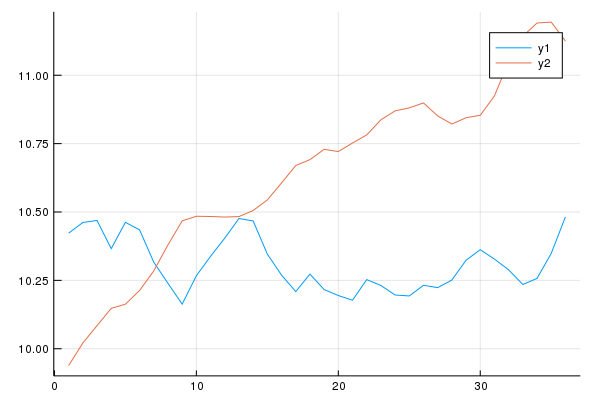

In [23]:
plot(log.([p_old[:A][1,end-1,end,:] p_new[:A][1,end-1,end,:]]))

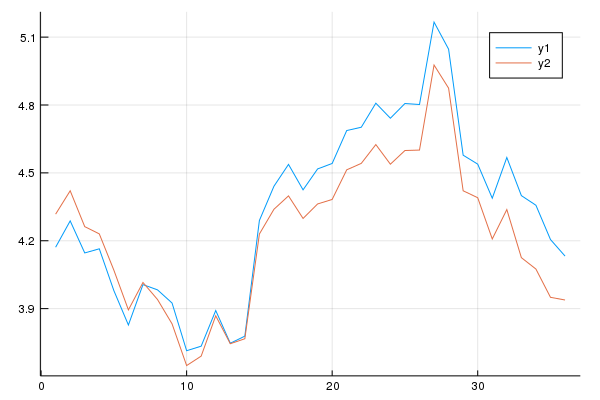

In [24]:
plot(log.([p_old[:A][1,end-1,10,:] p_new[:A][1,end-1,10,:]]))

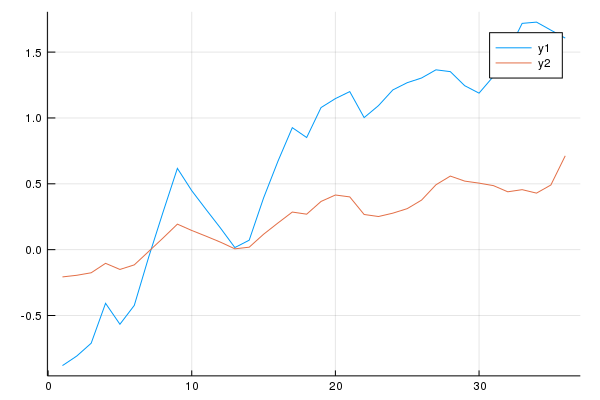

In [30]:
plot(log.([p_old[:p_sectoral][1,end-1,end,:] p_new[:p_sectoral][1,end-1,end,:]]))

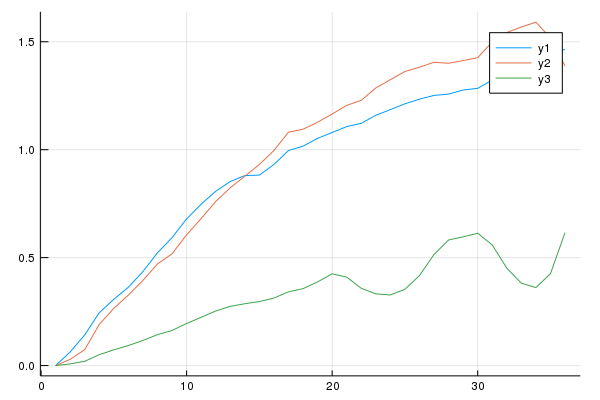

In [32]:
p_sectoral_data = data["p_sectoral_data"]
p_sectoral_base = p_sectoral_data ./ p_sectoral_data[:,:,:,1]
p_sectoral_US = p_sectoral_base[:,end:end,:,:]
plot(log.([p_sectoral_US[1,end,end,:] p_old[:p_sectoral][1,end,end,:] p_new[:p_sectoral][1,end,end,:]]))

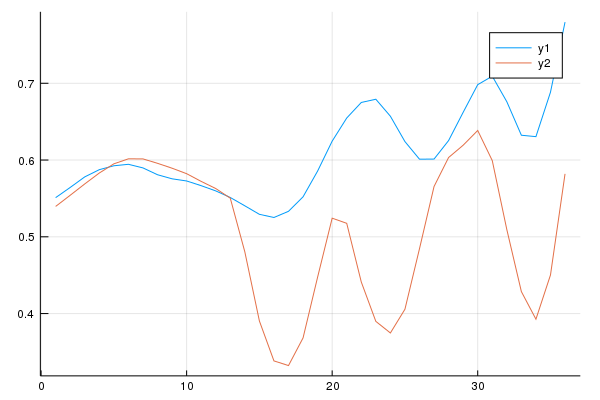

In [27]:
plot([p_old[:final_expenditure_shares][1,end-1,end,:] p_new[:final_expenditure_shares][1,end-1,end,:]])

In [93]:
nu = CalibrateParameters.calculate_expenditure_shares(p, data)

LoadError: [91mUndefVarError: CalibrateParameters not defined[39m

In [160]:
nu[1,end,end,:]

36-element Array{Float64,1}:
 0.637845
 0.636846
 0.66596 
 0.678876
 0.661158
 0.653243
 0.66453 
 0.652448
 0.686582
 0.688672
 0.672627
 0.594405
 0.711826
 ⋮       
 0.753972
 0.752161
 0.732625
 0.775447
 0.713635
 0.788468
 0.756814
 0.714754
 0.345939
 0.755568
 0.76878 
 0.744568

In [154]:
[revenue[1,end,:,end-2] expenditure[1,end,:,end-2] intermediate[1,end,:,end-2]]

24×3 Array{Float64,2}:
     3.35801e5       3.23345e5       8.89703e5
     8.82137e5       9.2212e5        3.05688e5
 71288.2         70289.5         12292.9      
 80451.1             1.27448e5   46385.6      
 30778.8         80003.0         28164.4      
  7094.37        49204.5         11894.8      
     1.11415e5  130552.0             1.09652e5
     1.90054e5       1.94135e5       1.38817e5
     1.05518e5       1.03912e5  207694.0      
     5.61198e5       6.55746e5  269040.0      
     7.66177e5       7.5044e5   463407.0      
     2.06445e5       2.74146e5  197063.0      
     1.37045e5       1.49904e5       1.85879e5
     1.9047e5        2.23709e5       2.99343e5
     2.97372e5       3.13951e5       2.66903e5
     3.55899e5   63662.2        214996.0      
     1.01505e5  -63018.5         43685.2      
     1.39226e5  -31221.8             1.31641e5
     2.52809e5       6.40801e5       1.64098e5
     2.27075e5  -13730.3             1.03467e5
     3.87347e5  524006.0             

In [155]:
expenditure[1,end,:,end-4:end]

24×5 Array{Float64,2}:
      2.83191e5       3.39261e5  …       2.88254e5       3.26752e5
      8.20532e5       8.75888e5          9.13425e5  943940.0      
  63532.0         63493.5            68450.5         64761.6      
      1.12498e5       1.13779e5          1.35885e5       1.28434e5
  36614.0         79907.8            84016.4         70729.1      
  37765.0         29254.4        …   51231.1         54504.9      
  97425.4             1.28704e5          1.28621e5       1.1789e5 
      1.84391e5  217945.0                2.06849e5  210880.0      
  99829.1             1.02786e5          1.05243e5       1.11751e5
      1.93935e5       3.40036e5          6.91542e5       5.95501e5
      6.60328e5       7.56944e5  …       1.93323e5       6.80072e5
      2.22705e5       2.36427e5         -6.18541e5       2.3319e5 
 125790.0             1.37668e5     168473.0             1.69746e5
      1.54187e5       2.10493e5     241572.0             2.72453e5
      2.77523e5       2.93153e5        

In [122]:
[diag(p[:d][:,:,end-2,end-2]) diag(p[:d][:,:,end-2,end-1]) diag(p[:d][:,:,end-2,end])]

25×3 Array{Float64,2}:
 0.543077   0.529018     0.554855  
 0.388917   0.359181     0.276211  
 0.0690676  1.00009e-12  1.0e-12   
 0.564189   0.552249     0.561421  
 0.922092   0.898468     0.923082  
 0.374714   0.448983     0.439149  
 0.324086   0.28478      0.332012  
 0.686354   0.622704     0.520404  
 0.619466   0.0180339    0.229562  
 0.405642   0.341867     0.463166  
 0.290327   0.219629     0.255506  
 0.788474   0.646783     0.7096    
 1.0e-12    1.00009e-12  0.0105004 
 0.72564    0.749717     0.771275  
 0.685512   0.677381     0.695546  
 0.341584   0.18606      1.0002e-12
 0.498119   0.503237     0.584429  
 0.76279    0.781959     0.779969  
 0.351819   0.318017     0.272556  
 0.555448   0.553747     0.61371   
 0.884494   0.872306     0.882433  
 0.470714   0.505525     0.608752  
 0.592052   0.58843      0.628431  
 0.725851   0.735931     0.728966  
 0.758176   0.727731     0.743303  

In [132]:
all(sum(p[:d], 2) .> .999)

true

In [137]:
inv(p[:d][:,:,end-2,end])

25×25 Array{Float64,2}:
  1.80525      -0.0101053     -2.75177    …    0.0175302    -0.0762846 
 -0.0242031     3.67572       16.7739         -0.504154      0.471559  
 -0.168153      2.39205     -254.594           3.35556      -3.16591   
  0.0056589    -0.012878      -1.98954        -0.00788445   -1.33011   
  0.000173427   0.00183852    -0.394975        0.0121873    -0.00441057
  0.00562185    0.00267296    -0.579997   …    0.0397533    -1.0544    
  0.0283096    -0.0307048     -6.21204         0.402527     -4.556     
  0.000369326   0.00816838    -3.45465         0.0934392     0.0857768 
 -0.0253155    -0.144289      30.7819         -1.06026       0.0655149 
  0.0163218    -0.0359515    -11.2229          0.323996     -0.37477   
  0.00594376   -0.0610896      0.896473   …   -0.0110035     0.353965  
 -0.000232981  -0.00468268     0.704172       -0.0258684    -0.00109979
 -0.0511582     1.42067       -4.56009        -1.52611     -13.4096    
 -0.000764816  -0.0352993      1.16074  

In [139]:
d_c, d_t = CalibrateParameters.DetrendUtilities.detrend(p[:d], p[:bp_weights])

([1.0339e-15 7.94093e-22 … 6.84403e-19 3.86247e-19; 8.04681e-20 9.4369e-16 … 4.92973e-19 1.36203e-18; … ; 6.24772e-18 2.32934e-20 … 9.08995e-16 1.07336e-17; 5.0822e-19 1.21761e-21 … 1.999e-19 1.0339e-15]

[1.02002e-15 5.67512e-20 … 5.9089e-18 2.03288e-18; 2.44623e-18 8.39606e-16 … 4.09286e-18 8.86335e-18; … ; 1.66425e-17 4.74338e-19 … 8.32667e-16 6.28837e-18; 4.90601e-18 9.82558e-20 … 3.82181e-18 9.71445e-16]

[9.08995e-16 3.17637e-22 … 7.31836e-18 8.5652e-18; 9.89334e-19 1.06165e-15 … 3.59142e-19 1.23667e-19; … ; 1.67421e-21 2.4564e-20 … 9.71445e-16 3.41524e-18; 2.13413e-22 1.00916e-22 … 4.13352e-19 1.02696e-15]

...

[8.53484e-16 5.01444e-19 … 4.0766e-17 7.71952e-17; 1.47723e-18 9.84498e-28 … 2.13046e-17 3.55618e-16; … ; 4.84503e-19 1.20617e-18 … 8.53484e-16 5.05238e-17; 2.28699e-19 1.0842e-18 … 1.40946e-17 8.74301e-16]

[9.22873e-16 5.89535e-19 … 1.51788e-17 1.24683e-17; 1.43996e-19 7.70217e-16 … 1.01915e-17 3.36103e-18; … ; 1.20617e-18 2.46656e-18 … 8.74301e-16 1.4962e-17; 2.77827e

In [143]:
d = p[:d]
d_t[:,:,end-2,end-2] .- d_t[:,:,end-2,end] 

25×25 Array{Float64,2}:
 -0.0161707    -0.000925595  -1.68635e-5   …  -0.00963452    0.0367313  
  0.000172875   0.0447195     0.000563123      0.00067243   -0.0260668  
  0.000101982  -0.0020741     0.0537665        0.00530104   -0.0952908  
  5.43923e-5   -0.00114755    5.3964e-5        0.00486915   -0.0151304  
 -1.97932e-5    0.000135107  -2.20159e-5       3.36378e-5    0.00370967 
 -2.47665e-5    0.000597023   3.49237e-5   …  -0.000503331   0.164966   
  9.38524e-5    0.000915725  -0.00309607       0.0138529    -0.0552033  
 -0.000454253  -0.000432767   0.000311825      0.00810641   -0.000983929
 -0.00123553   -0.00076423   -0.00527057      -0.0181137    -0.0649341  
  2.97467e-5    0.000288122   0.000731011      0.00293686    0.0578394  
  3.18473e-5   -0.000496705   0.000134167  …  -0.00252508    0.0681044  
  0.000436544   0.000298178   0.00173182      -0.00166734   -0.0475403  
  7.16442e-5   -0.000265741   0.000786925      0.0116084     0.0589411  
 -0.000252238  -0.000871051

In [148]:
inv(d[:,:,end-2,end-2])

25×25 Array{Float64,2}:
  1.84892      -0.0112752     0.0522532   …   -0.0483432       -1.87204 
  0.0351641     2.65225       0.0980923       -0.0959576      -11.9797  
  0.112761      0.0475368    15.5302          -0.179278       -26.1582  
 -0.155871     -0.151352     -0.235185         0.643325        48.4896  
  0.000638879  -0.000131333   0.00654792      -0.00133839      -0.197061
 -0.000308795  -0.0050858     0.0236646   …    0.0660917        0.202326
 -0.301904     -0.291616     -0.406586         1.45098         94.2021  
  0.00862996    0.00645432    0.0282497       -0.0396368       -2.41102 
 -0.0135838    -0.0010664    -0.160712         0.00705077       2.77605 
 -0.0239283    -0.105842     -0.254828        -0.021055         8.13646 
  0.0166569     0.00805384   -0.00550749  …   -0.0206157       -4.56932 
 -0.0444261    -0.0467362    -0.0614291        0.212377        13.9891  
 12.5148       12.0124       19.3661         -59.4375       -3916.74    
 -0.0465992    -0.0617082  

In [8]:
using GR
version()

"0.35.0"

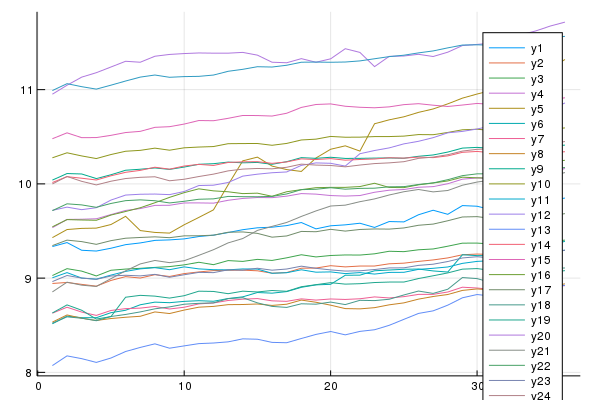

MethodError: [91mMethodError: no method matching complete_type(::QuoteNode)[0m
Closest candidates are:
  complete_type([91m::Type{#s13} where #s13<:Function[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:67
  complete_type([91m::Type{#s13} where #s13<:Type[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:68
  complete_type([91m::Type{#s13} where #s13<:Tuple[39m) at /Applications/JuliaPro-0.6.4.1.app/Contents/Resources/pkgs-0.6.4.1/v0.6/IJulia/src/handlers.jl:69
  ...[39m

In [40]:
plot(log.(p[:A][1,:,end,:]'))

In [42]:
minimum(p[:nu_njt])

-0.0075208532954233725